<a href="https://colab.research.google.com/github/johntango/Python100/blob/master/GradientDesc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick Review of Matrix, Vector Multiplication (Dot Product)
$\text{When using pen and paper most people write their vectors as vertical column vectors } $

$\left\{x \right\} = 
\left \{ 
  \begin{aligned}\ x_{1}  \\ x_{2}  \\  x_{3}  \\ ... \\ x_{n} 
\end{aligned}
\right \}$

$\text{However, in numpy its natural to think of a vector as a row } $
$\left \{x \right\}= \left \{ x_{1}, x_{2}, x_{3}  ... x_{n} \right \}$

 $\text{There is no right and wrong way to think of vector so long as you are consistent. }$
 $\text{In particular you may need to change the order of your dot products.}$
 $\text{For example, using math style column vectors we can write the equation of a line in x, y coordinates as }$
$\text{Writing this out using column vectors  }$
$$y = X.w $$
$$ \left \{ 
    \begin{aligned}
    y_1 \\ y_2 \\ ... \\y_n
    \end{aligned}
  \right \} =
  \begin{bmatrix} 1 & x_{1}  \\ 1 & x_{2}  \\ 1 & x_{3}  \\ ... \\ 1 & x_{n} 
  \end{bmatrix}
  \begin{equation}
\left\{ 
  \begin{aligned}
    w_0 \\ w_1
  \end{aligned}
  \right\} 
\end{equation}
$$

$\text{Alternatively, using Numpy style horizontal vectors } $
$$
\begin{equation}
  \begin{Bmatrix}
    w_0, w_1
  \end{Bmatrix}
  \begin{bmatrix}
    1,& 1, & 1,& ...&1\\
    x_{0}& x_{1} & x_2&...& x_n
  \end{bmatrix}=
  \begin{Bmatrix}
    y_0& y_1& y_2&...&y_n
  \end{Bmatrix}
\end{equation}
$$


$\text{Or in shorthand }$ 

$$w.X = y $$

## Make sure you understand the code below

In [1]:
import numpy as np

In [4]:
# show that we understand the dot product of two vectors
w = np.array([1, 2])    # w = [1, 2]
npoints = 5
myones = np.ones(npoints)  # myones = [1, 1, 1, 1, 1]
x = np.arange(0, npoints)  # x = [0, 1, 2, 3, 4]
x = np.vstack((myones, x)) # x = [[1, 1, 1, 1, 1], [0, 1, 2, 3, 4]]
print(f'w = {w}') 
print(f'x = {x}') 
y = np.dot(w,x)
print(f'y = {y}') #

w = [1 2]
x = [[1. 1. 1. 1. 1.]
 [0. 1. 2. 3. 4.]]
y = [1. 3. 5. 7. 9.]




# Linear Regression Model




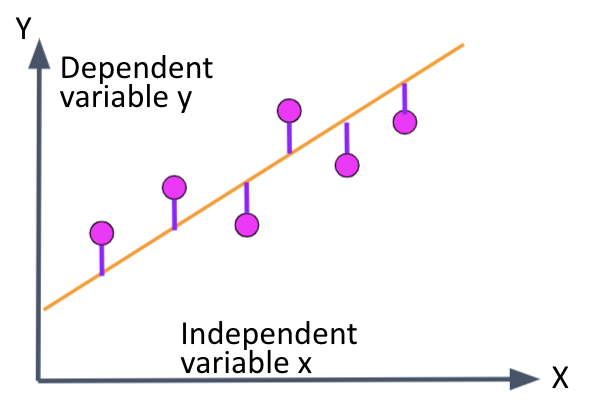

# Ordinary Linear Regression

$\text{Given data }y \text{ satisfying the IID requirement: (Independent and drawn from the Identically same Distribution) } $
$$y = w.X + e $$
$ X \text{ are the independent variables and } y \text{ are the dependent variables and } w \text{ the regression coefficients (or weights), and } e \text{ is the error} $

$\text{Writing this out as an example in } (x, y) \text{ space}$
$$
\begin{equation}
  \begin{Bmatrix}
    w_0, w_1
  \end{Bmatrix}
  \begin{bmatrix}
    1,& 1, & 1,& ...&1\\
    x_{0}& x_{1} & x_2&...& x_n
  \end{bmatrix}=
  \begin{Bmatrix}
    y_0& y_1& y_2&...&y_n
  \end{Bmatrix}
\end{equation}
$$


$\text{So our predictive model for y can be written }$ 

$$w.X = y $$
$\text{We can generate any } y_i \text{, given } x_i \text{, as follows:}$
$$y_i = w_0 + x_i.w_1$$

$\text{This can be solved analytically for smaller problems }$


# Measure of Error or Loss Function 

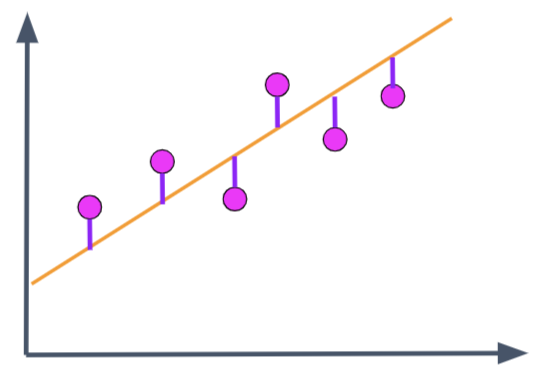

$\text{For large problems, and more generally in machine learning, we define a loss function. In this case we choose a least squares loss function }$
$$ E =\sum (y - w.X)(y-w.X )^{T} $$
$\text{where } y \text{ is the actual data and } w.X \text{ is the model prediction} $ 
$\text{Below we plot how the Error/Loss function varies with }w_0 \text{ and } w_1 $

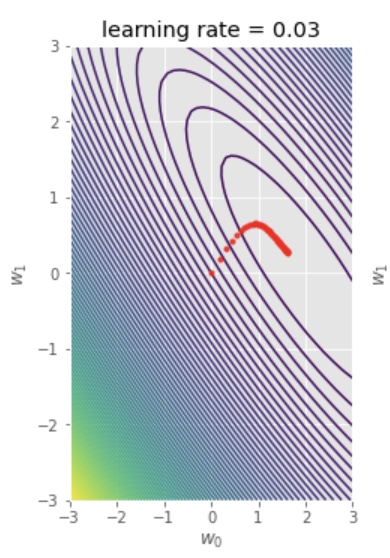


$\text{ We can find the gradient of } E \text{ with respect to } w $
\begin{equation}
\frac{\partial E}{\partial w} = \sum 2 (y - w. X).X = G
\end{equation}
$\text{ We need to update } w \text{ so that E, the loss function decreases } w $
$$w_n = w_{n-1} - \bigtriangleup G $$
$\text{ We introduce a learning rate } \eta $
$$w_n = w_{n-1} - \eta G $$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

npoints = 10
x = np.arange(npoints,1)
myones = np.ones(npoints)
x = np.arange(0, npoints)
x = np.vstack((myones, x))      # add a row of 1 to represent the constant term
w = np.array([0,0])

y = np.dot(w, x)               # equivalent to y = w*x + w0
# later we use the function y = model(w, xy) to achieve the same
plt.plot(x[1], y, 'b.')
y = y + 1
plt.plot(x[1], y, 'r.')

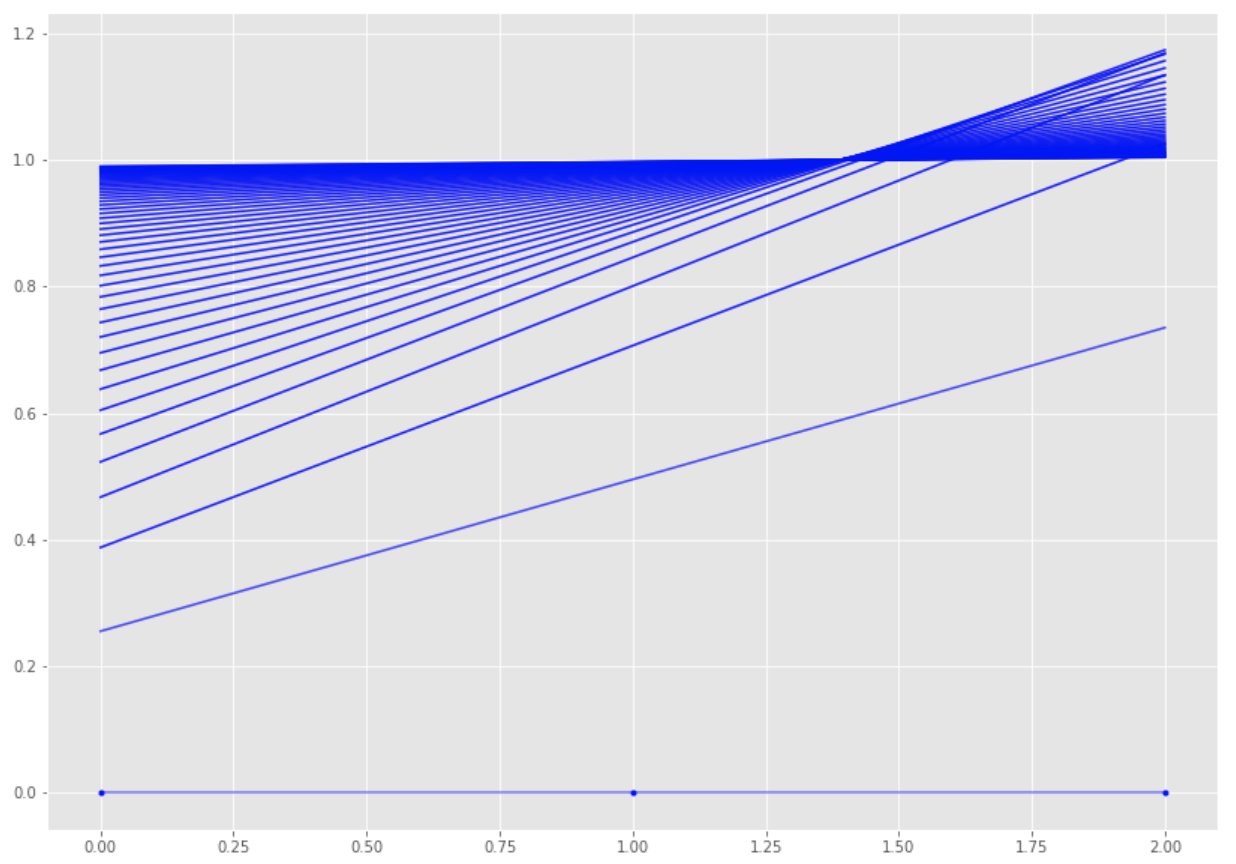

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
plt.style.use(['ggplot'])

def gradient_descent(xy, max_iterations, w,
                     obj_func, mse_func, grad_func, extra_param=[],
                     learning_rate=0.05, momentum=0.8):
    (x, y) = xy

    w_history = w
    f_history = obj_func(w, x)
    cost_history = mse_func(w, xy)
    delta_w = np.zeros(2)
    i = 0
    while i < max_iterations:
        delta_w = -learning_rate * grad_func(w, xy)
        w = w + delta_w
        # store the history of w and f
        w_history = np.vstack((w_history, w))
        ypredicted = obj_func(w, x)
        f_history = np.vstack((f_history, ypredicted))
        cost_history = np.vstack((cost_history, mse_func(w, xy)))
        i = i + 1
    return w_history, f_history, cost_history


def grad_mse(w, xy):
    (x, y) = xy
    # Compute the output
    ypredicted = model(w, x)
    diff = y - ypredicted
    grad = -np.dot(x, diff)   # this gives gradient of both w's
    return grad


def mse(w, xy):
    (x, y) = xy
    xt = np.transpose(x)
    ypredicted = np.dot(w, x)
    loss = np.sum((y - ypredicted)*(y - ypredicted))
    m = 2 * len(y)
    loss = loss / m
    return loss


def model(w, x):
    ypred = np.dot(w, x)
    return ypred


In [ ]:

ndim = 2
npoints = 3
w = np.array([0, 0])
myones = np.ones(npoints)
x = np.arange(0, npoints)
x = np.vstack((myones, x))
y = model(w, x)
y = y + 1
xy = (x, y)
print(xy)
max_iterations = 100
w_hist, f_hist, c_hist = gradient_descent(
    xy, max_iterations,  w, model, mse, grad_mse, learning_rate=0.1, momentum=0.8)
#print(f'W: {w_hist}')
#print(f'function hist: {f_hist}')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
iterations = len(c_hist)
_ = ax.plot(range(iterations), c_hist, 'o')
fig.show()

In [ ]:
def plot_GD(xy, w, max_iterations,learning_rate,ax,ax1=None):
  x,y = xy
  y = model(w,x)
  xt = np.transpose(x)
  _ = ax.plot(x[1],y,'b.')
  
  tr = 0.5
  for i in range(max_iterations):
    pred_prev = np.dot(w,x)
    w_hist, f_hist, c_hist = gradient_descent( xy, max_iterations-1, w, model, mse, grad_mse, [], learning_rate=0.05, momentum=0.8)
    pred = model(w,x)
    if ((i % 2 == 0) ):
      ypred = f_hist[i]
      _ = ax.plot(x[1],ypred, 'b-',alpha=tr)
      if tr < 0.8:
        tr = tr+0.2   
    if not ax1== None:
      _ = ax1.plot(range(n_iter),c_hist,'o')  

In [ ]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
w = np.array([0,0])
it_lr =[(200,0.001),(50,0.01),(20,0.05),(10,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    ax = fig.add_subplot(4, 2, count)
    count += 1
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(xy, w, n_iter, lr, ax, ax1)
    

In [ ]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(xy, w, 100,0.1,ax)


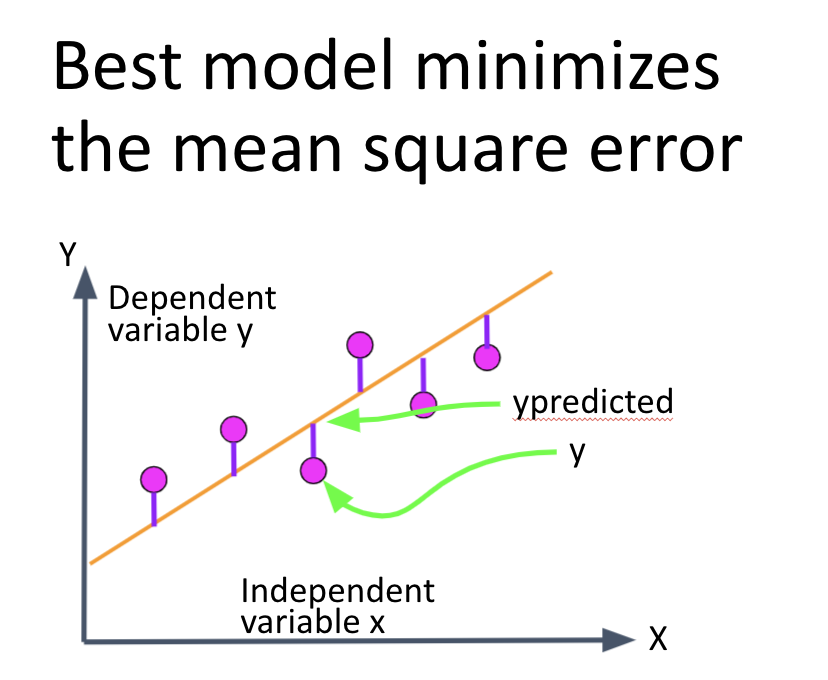

$$loss = (y - (x.w^{T}))^2   $$
$$loss = (y - (w[0] + w[1]*x)^2   $$

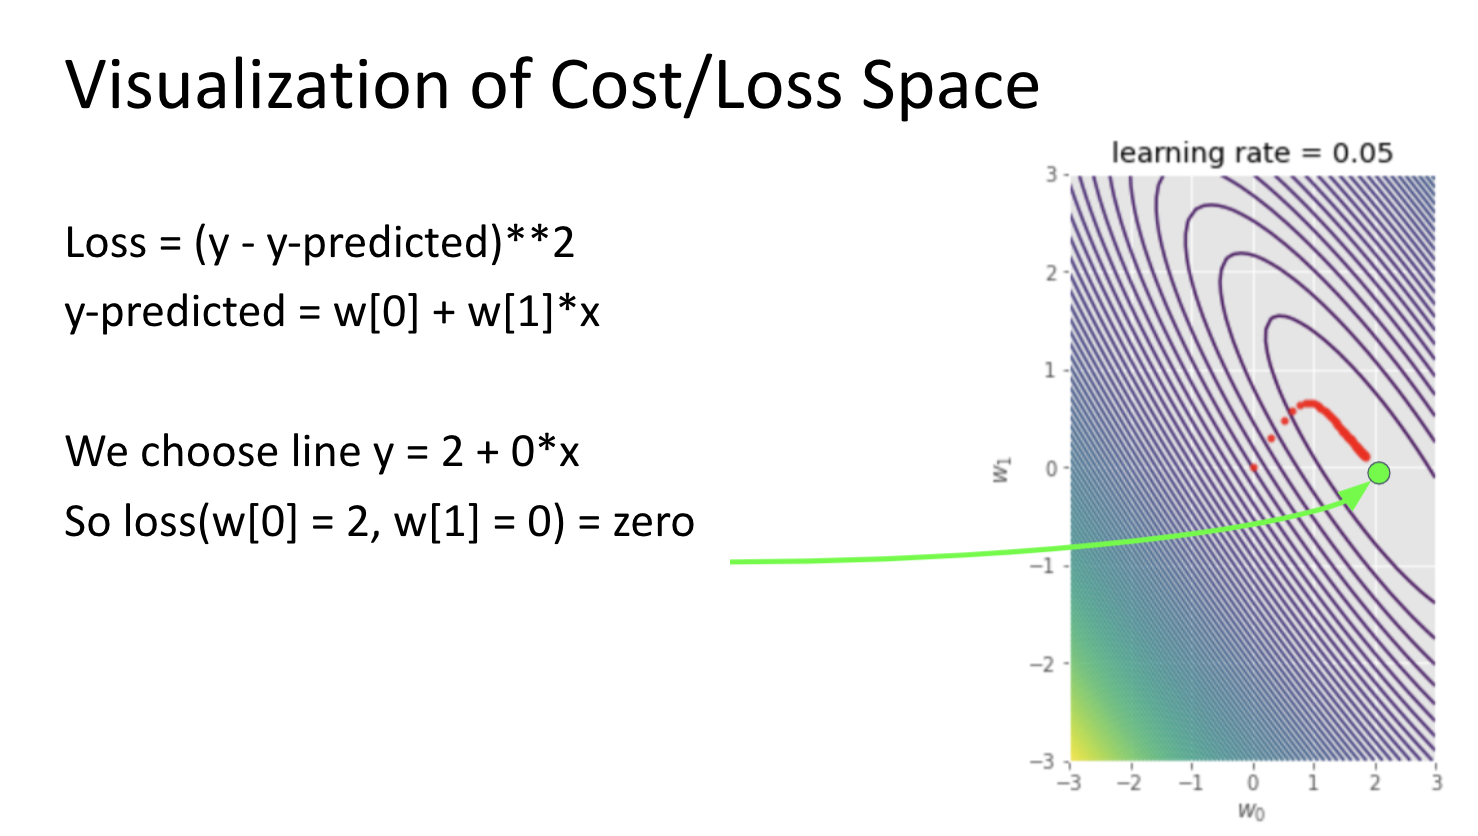

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

cost = lambda w: .5*np.mean((w[0] + w[1]*x - y)**2)
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
  
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

In [ ]:


ndim = 2
npoints = 3
w = np.array([0, 0])
myones = np.ones(npoints)
x = np.arange(0, npoints)
x = np.vstack((myones, x))
y = model(w,x)
y = y + 2
xy = (x,y)
print(xy)
max_iterations = 50
learning_rates = np.array([0.01,.03,0.05])

fig, axes = plt.subplots(ncols=len(learning_rates), nrows=1, constrained_layout=True, figsize=(10, 5))
for i, lr in enumerate(learning_rates):

  w_hist, f_hist, c_hist = gradient_descent(xy, max_iterations, w,model, mse, grad_mse,learning_rate = lr, momentum=0.8)
  print(w_hist[2])
  d = 3
  plot_contour(cost, [-d,d], [-d,d], 50, axes[i])
    # get the history for plotting
  axes[i].plot(w_hist[:,0], w_hist[:,1], '.r', alpha=.8)

  axes[i].set_xlabel(r'$w_0$')
  axes[i].set_ylabel(r'$w_1$')
  axes[i].set_title(f'learning rate = {lr}')
  axes[i].set_xlim([-d,d])
  axes[i].set_ylim([-d,d])
plt.show()

# Generating noisy data

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
cost = lambda w: .5*np.mean((w[0] + w[1]*x - y)**2)
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
  
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
npoints = 41
x = np.linspace(-5, 5, npoints)
x = np.vstack((np.ones(len(x)),x))
w = np.array([1,1])
scale = 1
y = np.dot(w,x) + (np.random.random(npoints)-0.5)*scale # this generates noise + and - scale/2
plt.plot(x[1],y)
xy = (x,y)

w_init = np.array([0,0]) # initial values for  
max_iterations = 50
learning_rates = np.array([0.001,.003,0.006])

fig, axes = plt.subplots(ncols=len(learning_rates), nrows=1, constrained_layout=True, figsize=(10, 5))
for i, lr in enumerate(learning_rates):

  w_hist, f_hist, c_hist = gradient_descent(xy, max_iterations, w_init, model, mse, grad_mse,learning_rate = lr, momentum=0.8)
  d = 3
  plot_contour(cost, [-d,d], [-d,d], 50, axes[i])
    # get the history for plotting
  axes[i].plot(w_hist[:,0], w_hist[:,1], '.r', alpha=.8)
  axes[i].set_xlabel(r'$w_0$')
  axes[i].set_ylabel(r'$w_1$')
  axes[i].set_title(f'learning rate = {lr}')
  axes[i].set_xlim([-d,d])
  axes[i].set_ylim([-d,d])
plt.show()